## Assignment : 14

<pre>
1. Download the preprocessed DonorsChoose data from here <a href='https://drive.google.com/file/d/1GU3LIJJ3zS1xLXXe-sdItSJHtI5txjVO/view?usp=sharing'>Dataset</a>
2. Split the data into train, cv, and test
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric. you need to print the AUC value for each epoch. Note: you should NOT use the tf.metric.auc
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. You should Save the best model weights.
8. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
9. Use Categorical Cross Entropy as Loss to minimize.
10. try to get AUC more than 0.8 for atleast one model
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [0]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data feature 'essay' <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Input , Dropout
from keras.layers import Flatten
from keras.layers import concatenate
from keras.layers.embeddings import Embedding
from keras.models import Model
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
import pickle
from keras.layers import LSTM
from keras.preprocessing.text import text_to_word_sequence
import tensorflow as tf
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
from keras.layers.normalization import BatchNormalization
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from keras.regularizers import l2
from sklearn.metrics import roc_auc_score
from keras.models import load_model
from IPython.display import Image
from scipy.sparse import hstack
from keras.layers import Conv1D
from sklearn.feature_extraction.text import CountVectorizer
from prettytable import PrettyTable

Using TensorFlow backend.


In [2]:
import pandas as pd
data=pd.read_csv('preprocessed_data.csv')
data.shape

(109248, 9)

In [3]:
data.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [4]:
y=data['project_is_approved'].values
y.shape

(109248,)

In [0]:
data.drop(['project_is_approved'],axis=1,inplace=True)

In [6]:
data.shape

(109248, 8)

**SPLITTING THE DATA**

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,y,test_size=0.30,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.30,stratify=y_train)
print(X_train.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)
print(X_test.shape,y_test.shape)    

(53531, 8) (53531,)
(22942, 8) (22942,)
(32775, 8) (32775,)


In [0]:
y_train = to_categorical(y_train, num_classes=2)
y_cv =to_categorical(y_cv,num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

**TOKENIZING ESSAY WORDS**

In [9]:
token = Tokenizer()
token.fit_on_texts(X_train['essay'])
vocab_size = len(token.word_index) +1
print('Total unique words in the x_train',vocab_size)
encoded_train = token.texts_to_sequences(X_train['essay'])
encoded_cv = token.texts_to_sequences(X_cv['essay'])
encoded_test = token.texts_to_sequences(X_test['essay'])

Total unique words in the x_train 42722


In [10]:
len(encoded_train)

53531

In [0]:
length = []
for sentence in encoded_train:
    length.append(len(sentence))

s = list(set(length))
count = []
for i in s:
    count.append(length.count(i))

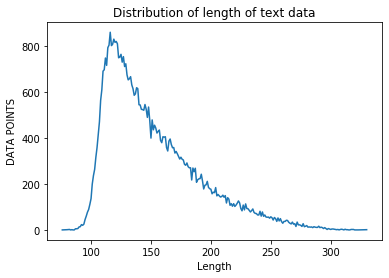

In [12]:
plt.plot(s,count)
plt.xlabel('Length')
plt.ylabel('DATA POINTS')
plt.title('Distribution of length of text data')
plt.show()


**PADDING**

In [13]:
max_length = 300
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_cv    =pad_sequences(encoded_cv,maxlen=max_length,padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print("length of padded_train data",len(padded_train))
print("length of padded_cv data",len(padded_cv))
print("length of padded_test data",len(padded_test))

length of padded_train data 53531
length of padded_cv data 22942
length of padded_test data 32775


In [0]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
embedding_matrix_train = np.zeros((vocab_size, 300))
for word, i in token.word_index.items():
    if word in glove_words:
        embedding_vector = model[word]
        embedding_matrix_train[i] = embedding_vector

**ENCODING CATEGORICAL VARIABLES**

In [0]:
def label_encoder(column):
    unique = list(set(column))
    total = list(column)
    size = len(unique)
    count = []
    for category in unique:
        count.append([total.count(category),category])
    count.sort()
    rank = {}
    for i in range(1,len(count)+1):
        rank.update({count[i-1][1] : i})
    return (rank,unique,size)

In [17]:
category_rank,unique,size = label_encoder(X_train['clean_categories'])
print(category_rank)
categories_size = size
encoded_cat_train = []
encoded_cat_cv   =[]
encoded_cat_test = []
for category in X_train['clean_categories']:
    encoded_cat_train.append(category_rank[category])
for category in X_cv['clean_categories']:
    if category in unique:
        encoded_cat_cv.append(category_rank[category]) 
    else:
        encoded_cat_cv.append(0) 
    
for category in X_test['clean_categories']:
    if category in unique:
        encoded_cat_test.append(category_rank[category]) 
    else:
        encoded_cat_test.append(0) 
    
encoded_cat_train = np.asarray(encoded_cat_train)
encoded_cat_cv = np.asarray(encoded_cat_cv)
encoded_cat_test = np.asarray(encoded_cat_test)

print(encoded_cat_train.shape)
print(encoded_cat_cv.shape)
print(encoded_cat_test.shape)

{'literacy_language warmth care_hunger': 1, 'music_arts warmth care_hunger': 2, 'music_arts appliedlearning': 3, 'history_civics health_sports': 4, 'math_science warmth care_hunger': 5, 'appliedlearning warmth care_hunger': 6, 'music_arts health_sports': 7, 'music_arts history_civics': 8, 'specialneeds warmth care_hunger': 9, 'health_sports warmth care_hunger': 10, 'health_sports history_civics': 11, 'specialneeds health_sports': 12, 'history_civics appliedlearning': 13, 'literacy_language health_sports': 14, 'music_arts specialneeds': 15, 'health_sports music_arts': 16, 'appliedlearning history_civics': 17, 'health_sports appliedlearning': 18, 'history_civics specialneeds': 19, 'health_sports math_science': 20, 'specialneeds music_arts': 21, 'history_civics music_arts': 22, 'history_civics math_science': 23, 'math_science health_sports': 24, 'appliedlearning health_sports': 25, 'math_science history_civics': 26, 'literacy_language appliedlearning': 27, 'appliedlearning music_arts': 28

In [18]:
subcategory_rank,unique,size = label_encoder(X_train['clean_subcategories'])
print(subcategory_rank)
subcategories_size = size
encoded_subcat_train = []
encoded_subcat_cv   =[]
encoded_subcat_test = []
for category in X_train['clean_subcategories']:
    encoded_subcat_train.append(subcategory_rank[category])
for category in X_cv['clean_subcategories']:
    if category in unique:
        encoded_subcat_cv.append(subcategory_rank[category]) 
    else:
        encoded_subcat_cv.append(0) 
    
for category in X_test['clean_subcategories']:
    if category in unique:
        encoded_subcat_test.append(subcategory_rank[category]) 
    else:
        encoded_subcat_test.append(0) 
    
encoded_subcat_train = np.asarray(encoded_subcat_train)
encoded_subcat_cv = np.asarray(encoded_subcat_cv)
encoded_subcat_test = np.asarray(encoded_subcat_test)

print(encoded_subcat_train.shape)
print(encoded_subcat_cv.shape)
print(encoded_subcat_test.shape)

{'appliedsciences economics': 1, 'appliedsciences foreignlanguages': 2, 'appliedsciences nutritioneducation': 3, 'charactereducation nutritioneducation': 4, 'civics_government foreignlanguages': 5, 'civics_government parentinvolvement': 6, 'civics_government teamsports': 7, 'college_careerprep gym_fitness': 8, 'college_careerprep teamsports': 9, 'college_careerprep warmth care_hunger': 10, 'communityservice esl': 11, 'communityservice music': 12, 'earlydevelopment economics': 13, 'economics foreignlanguages': 14, 'economics health_lifescience': 15, 'economics literature_writing': 16, 'economics music': 17, 'economics nutritioneducation': 18, 'esl economics': 19, 'esl financialliteracy': 20, 'extracurricular financialliteracy': 21, 'extracurricular foreignlanguages': 22, 'financialliteracy foreignlanguages': 23, 'financialliteracy health_wellness': 24, 'financialliteracy parentinvolvement': 25, 'financialliteracy performingarts': 26, 'financialliteracy socialsciences': 27, 'gym_fitness 

In [19]:
state_rank,unique,size =label_encoder(X_train['school_state'])
print(state_rank)
state_size = size
encoded_state_train = []
encoded_state_cv=[]
encoded_state_test = []
for state in X_train['school_state']:
    encoded_state_train.append(state_rank[state])
for state in X_cv['school_state']:
    if state in unique:
        encoded_state_cv.append(state_rank[state]) 
    else:
        encoded_state_cv.append(0)
for state in X_test['school_state']:
    if state in unique:
        encoded_state_test.append(state_rank[state]) 
    else:
        encoded_state_test.append(0) 
    
encoded_state_train = np.asarray(encoded_state_train)
encoded_state_cv=np.asarray(encoded_state_cv)
encoded_state_test = np.asarray(encoded_state_test)

print(encoded_state_train.shape)
print(encoded_state_cv.shape)
print(encoded_state_test.shape)

{'vt': 1, 'wy': 2, 'nd': 3, 'ri': 4, 'mt': 5, 'sd': 6, 'ne': 7, 'nh': 8, 'ak': 9, 'de': 10, 'wv': 11, 'me': 12, 'hi': 13, 'dc': 14, 'nm': 15, 'ks': 16, 'id': 17, 'ia': 18, 'ar': 19, 'co': 20, 'mn': 21, 'or': 22, 'ms': 23, 'ky': 24, 'nv': 25, 'md': 26, 'ct': 27, 'ut': 28, 'tn': 29, 'al': 30, 'wi': 31, 'va': 32, 'az': 33, 'ma': 34, 'ok': 35, 'nj': 36, 'la': 37, 'wa': 38, 'oh': 39, 'mo': 40, 'in': 41, 'pa': 42, 'mi': 43, 'sc': 44, 'ga': 45, 'il': 46, 'nc': 47, 'fl': 48, 'ny': 49, 'tx': 50, 'ca': 51}
(53531,)
(22942,)
(32775,)


In [20]:
teacher_prefix_rank, unique,size = label_encoder(X_train['teacher_prefix'])
print(teacher_prefix_rank)
teacher_prefix_size =size
encoded_prefix_train = []
encoded_prefix_cv=[]
encoded_prefix_test = []
for prefix in X_train['teacher_prefix']:
    encoded_prefix_train.append(teacher_prefix_rank[prefix])
for prefix in X_cv['teacher_prefix']:
    if prefix in unique:
        encoded_prefix_cv.append(teacher_prefix_rank[prefix]) 
    else:
        encoded_prefix_cv.append(0) 

for prefix in X_test['teacher_prefix']:
    if prefix in unique:
        encoded_prefix_test.append(teacher_prefix_rank[prefix]) 
    else:
        encoded_prefix_test.append(0) 
    
encoded_prefix_train = np.asarray(encoded_prefix_train)
encoded_prefix_cv=np.asarray(encoded_prefix_cv)
encoded_prefix_test = np.asarray(encoded_prefix_test)

print(encoded_prefix_train.shape)
print(encoded_prefix_cv.shape)
print(encoded_prefix_test.shape)

{'dr': 1, 'teacher': 2, 'mr': 3, 'ms': 4, 'mrs': 5}
(53531,)
(22942,)
(32775,)


In [21]:
project_grade_rank,unique,size =label_encoder(X_train['project_grade_category'])
print(project_grade_rank)
project_grade_categories_size = size
encoded_grade_train = []
encoded_grade_cv=[]
encoded_grade_test = []
for grade in X_train['project_grade_category']:
    encoded_grade_train.append(project_grade_rank[grade])
for grade in X_cv['project_grade_category']:
    if grade in unique:
        encoded_grade_cv.append(project_grade_rank[grade]) 
    else:
        encoded_grade_cv.append(0) 

for grade in X_test['project_grade_category']:
    if grade in unique:
        encoded_grade_test.append(project_grade_rank[grade]) 
    else:
        encoded_grade_test.append(0) 
    
encoded_grade_train = np.asarray(encoded_grade_train)
encoded_grade_cv=np.asarray(encoded_grade_cv)
encoded_grade_test = np.asarray(encoded_grade_test)

print(encoded_grade_train.shape)
print(encoded_grade_cv.shape)
print(encoded_grade_test.shape)

{'grades_9_12': 1, 'grades_6_8': 2, 'grades_3_5': 3, 'grades_prek_2': 4}
(53531,)
(22942,)
(32775,)


In [22]:
encoded_grade_train[0:5]

array([2, 4, 3, 4, 2])

**STANDARDIZING NUMERICAL FEATURES**

In [23]:
# price

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = scaler.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = scaler.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = scaler.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_cv_price_norm.shape,y_cv.shape)
print(X_test_price_norm.shape, y_test.shape)

After vectorizations
(53531, 1) (53531, 2)
(22942, 1) (22942, 2)
(32775, 1) (32775, 2)


In [24]:
scaler = StandardScaler()

scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_projects_norm = scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_projects_norm = scaler.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_projects_norm = scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_projects_norm.shape, y_train.shape)
print(X_cv_projects_norm.shape,y_cv.shape)
print(X_test_projects_norm.shape, y_test.shape)

After vectorizations
(53531, 1) (53531, 2)
(22942, 1) (22942, 2)
(32775, 1) (32775, 2)


In [0]:
left_input_train = np.hstack((X_train_price_norm,X_train_projects_norm))
left_input_cv = np.hstack((X_cv_price_norm,X_cv_projects_norm))
left_input_test = np.hstack((X_test_price_norm,X_test_projects_norm))

**MODEL 1**

In [0]:
essay_text=Input(shape=(300,),name='essay_text')
x=Embedding(vocab_size,300,weights=[embedding_matrix_train],input_length=300)(essay_text)
lstm_1=LSTM(50,recurrent_dropout=0.5,return_sequences=True)(x)
flatten_1=Flatten()(lstm_1)

state=Input(shape=(1,),name="state")
x=Embedding(state_size+1,2,input_length=1)(state)
flatten_2=Flatten()(x)

project_grade_category=Input(shape=(1,),name='project_grade_category')
x=Embedding(project_grade_categories_size+1,2,input_length=1)(project_grade_category)
flatten_3=Flatten()(x)

clean_categories=Input(shape=(1,),name='clean_categories')
x=Embedding(categories_size+1,4,input_length=1)(clean_categories)
flatten_4=Flatten()(x)

subcategory=Input(shape=(1,),name='subcategory')
x=Embedding(subcategories_size+1,4,input_length=1)(subcategory)
flatten_5=Flatten()(x)

teacher_prefix=Input(shape=(1,),name='teacher_prefix')
x=Embedding(teacher_prefix_size+1,4,input_length=1)(teacher_prefix)
flatten_6=Flatten()(x)

left_input=Input(shape=(2,),name='left_input')
dense_1 = Dense(1, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(left_input)

x=concatenate([flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,flatten_6,dense_1])

x = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
x = Dropout(.5)(x)
x = Dense(128, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
x = Dropout(.5)(x)
x = BatchNormalization()(x)

x = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
final_output = Dense(2, activation='softmax')(x)

model = Model(inputs=[essay_text,state,project_grade_category,clean_categories,subcategory,teacher_prefix,left_input], outputs=[final_output])
print(model.summary())



Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_text (InputLayer)         (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 300, 300)     12768900    essay_text[0][0]                 
__________________________________________________________________________________________________
state (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
project_grade_category (InputLa (None, 1)            0                                            
____________________________________________________________________________________________

In [0]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)


In [0]:
train_data = [padded_train,encoded_state_train,encoded_grade_train,encoded_cat_train,encoded_subcat_train,encoded_prefix_train,left_input_train]
cv_data = [padded_cv,encoded_state_cv,encoded_grade_cv,encoded_cat_cv,encoded_subcat_cv,encoded_prefix_cv,left_input_cv]
test_data = [padded_test,encoded_state_test,encoded_grade_test,encoded_cat_test,encoded_subcat_test,encoded_prefix_test,left_input_test]

In [0]:
from keras.callbacks import TensorBoard
checkpoint_1 = ModelCheckpoint("model_1.1",
                             monitor="val_auroc",
                             mode="max",
                             save_best_only = True,
                             verbose=1)
earlystop = EarlyStopping(monitor = 'val_auroc', 
                            mode="max",
                            min_delta = 0, 
                            patience = 2,
                            verbose = 1,)
tensorboard=TensorBoard(log_dir='lstm_1',batch_size=512)
callbacks_1=[checkpoint_1,earlystop,tensorboard]

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
LSTM_1 = model.fit(train_data, y_train, batch_size=512, epochs=10, verbose=1,callbacks=callbacks_1, validation_data=(cv_data, y_cv))

Train on 53531 samples, validate on 22942 samples
Epoch 1/10
53531/53531 [==============================] - 456s 9ms/step - loss: 0.9474 - auroc: 0.5201 - val_loss: 0.7758 - val_auroc: 0.4897

Epoch 00001: val_auroc improved from -inf to 0.48968, saving model to model_1.1
Epoch 2/10
53531/53531 [==============================] - 455s 9ms/step - loss: 0.7112 - auroc: 0.6025 - val_loss: 0.7190 - val_auroc: 0.7081

Epoch 00002: val_auroc improved from 0.48968 to 0.70813, saving model to model_1.1
Epoch 3/10
53531/53531 [==============================] - 450s 8ms/step - loss: 0.5906 - auroc: 0.7181 - val_loss: 0.6186 - val_auroc: 0.7448

Epoch 00003: val_auroc improved from 0.70813 to 0.74482, saving model to model_1.1
Epoch 4/10
53531/53531 [==============================] - 449s 8ms/step - loss: 0.5175 - auroc: 0.7632 - val_loss: 0.5965 - val_auroc: 0.7520

Epoch 00004: val_auroc improved from 0.74482 to 0.75200, saving model to model_1.1
Epoch 5/10
53531/53531 [=========================

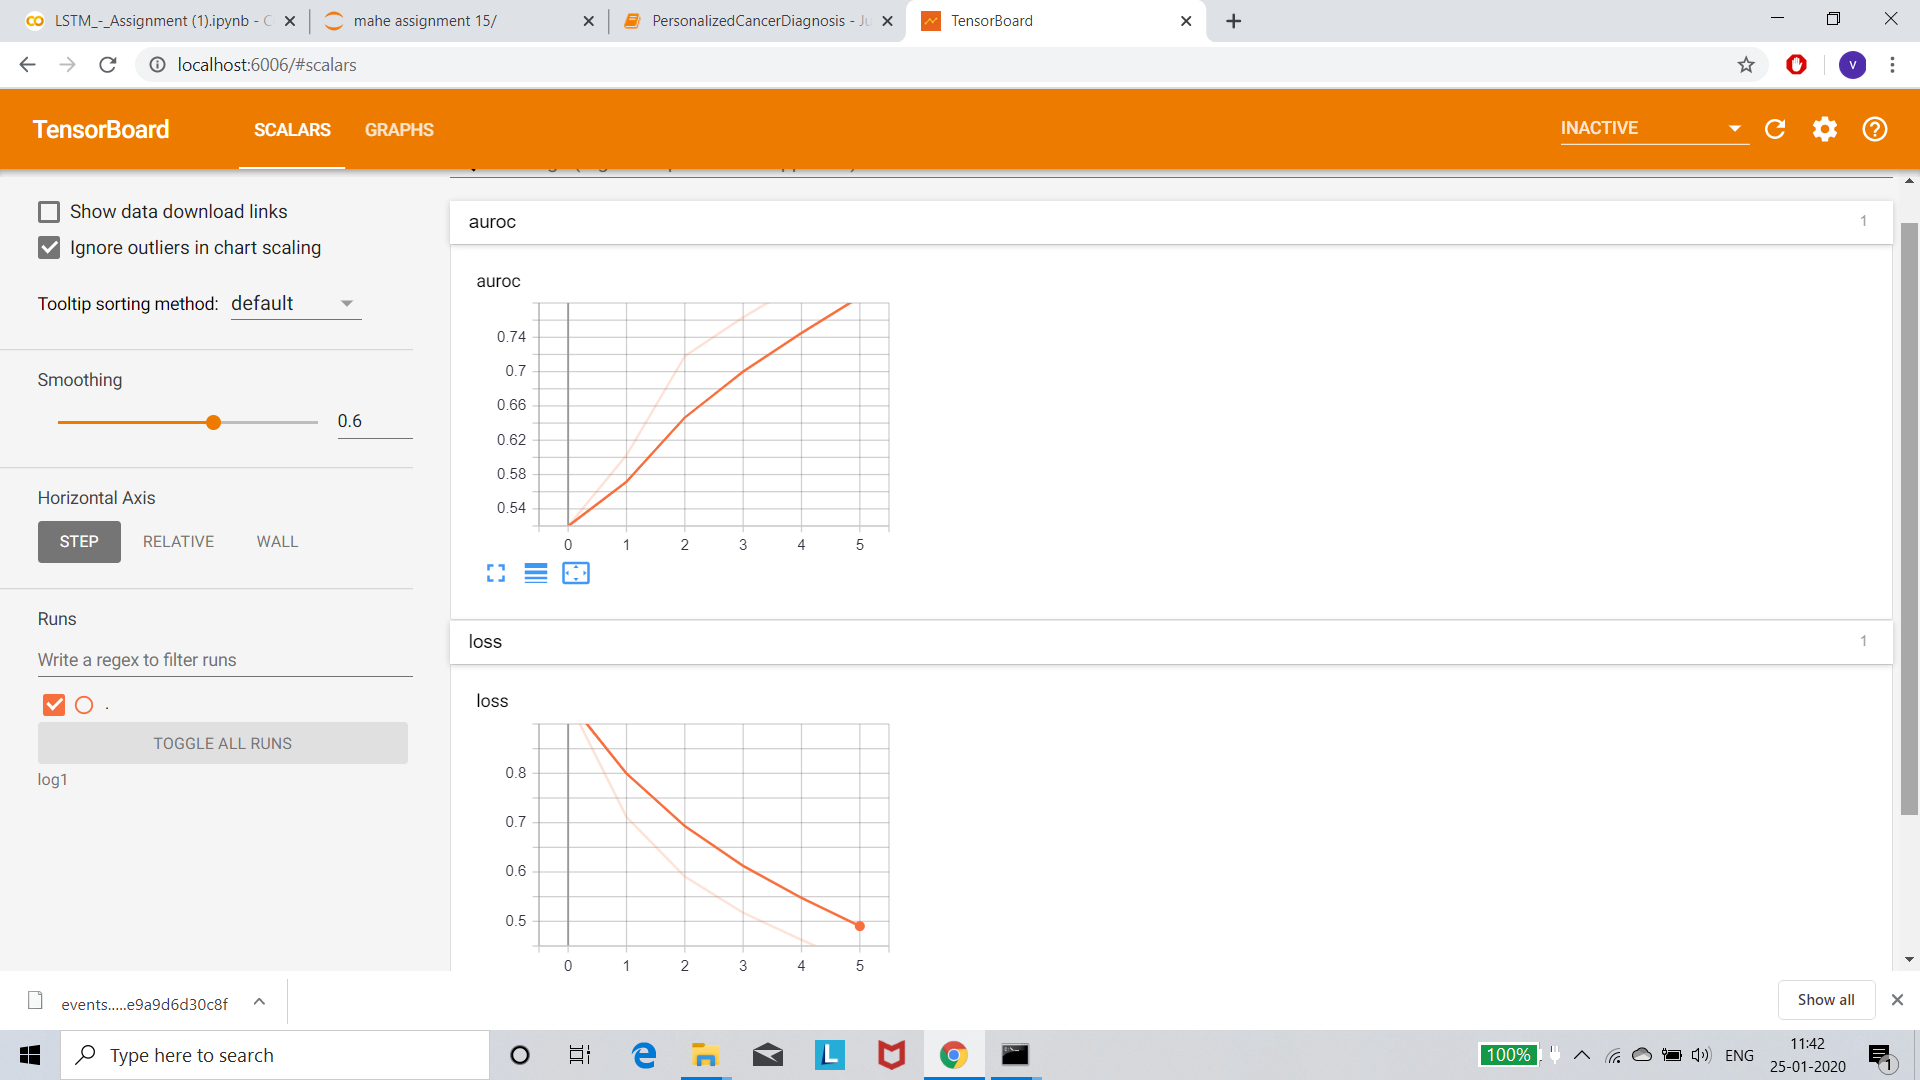

In [0]:
Image(retina=True, filename='/content/Screenshot (26).png')

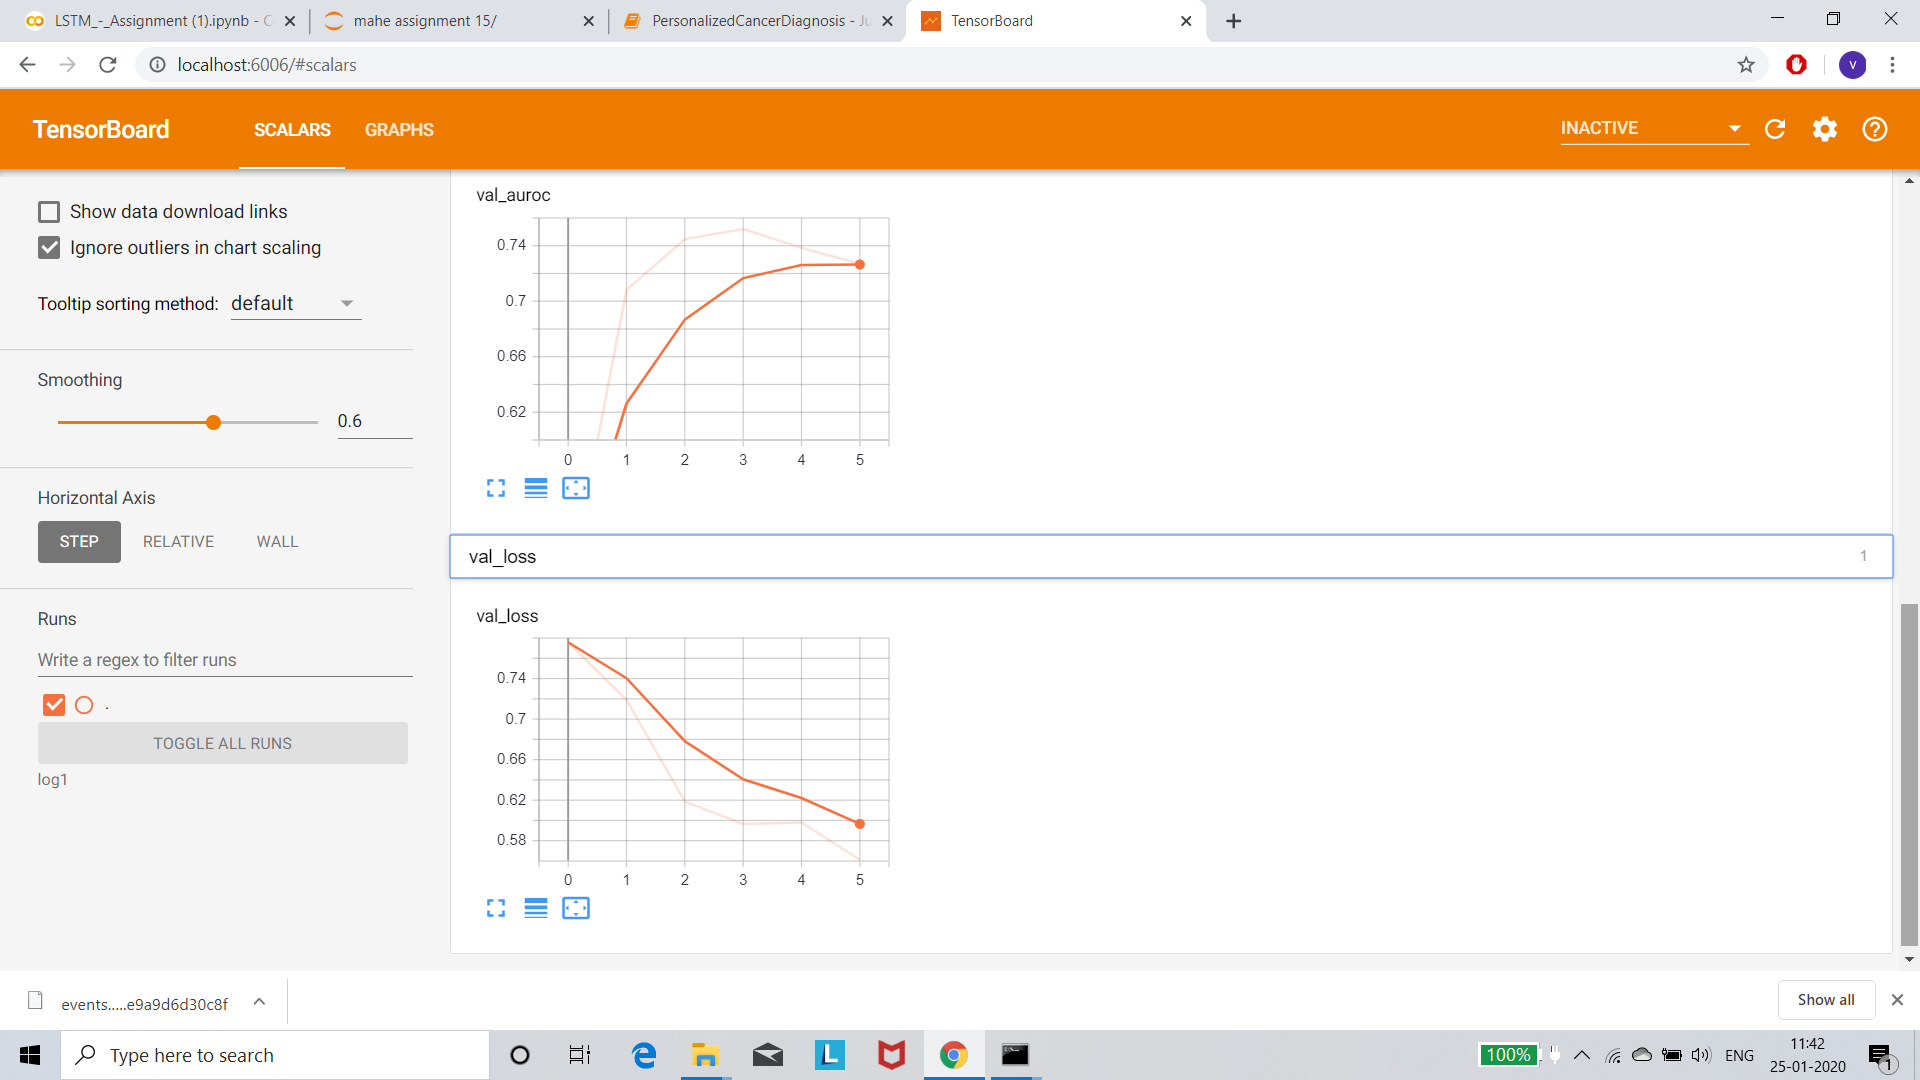

In [0]:
Image(retina=True, filename='/content/Screenshot (27).png')

**MODEL 2**

In [26]:
vectorizer = TfidfVectorizer(min_df=5)
X_train_essay_tfidf = vectorizer.fit_transform(X_train['essay'].values)
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)

After vectorizations
(53531, 16961) (53531, 2)


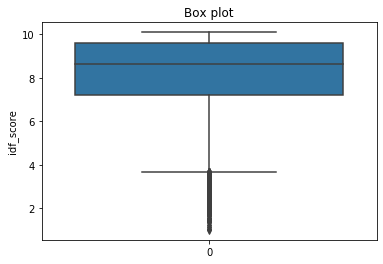

In [27]:
idf = vectorizer.idf_
sns.boxplot(data=idf)
plt.title('Box plot')
plt.ylabel('idf_score')
plt.show()


In [28]:
len(idf)

16961

In [0]:
feature_names = np.asarray(vectorizer.get_feature_names()) 
index = []
for i in range(len(idf)):
    if idf[i] >= 2 and idf[i] <=10:
        index.append(i)
imp_words = []
for i in index:
    imp_words.append(feature_names[i])

In [30]:
print('total words=',len(feature_names))
print('important words=',len(imp_words))

total words= 16961
important words= 15665


In [31]:
# train_data
X_train_essay_imp = []
for essay in X_train['essay']:
    sentence = []
    for word in essay.split():
        if word in imp_words:
            sentence.append(word)      
    X_train_essay_imp.append(' '.join(sentence))
print(len(X_train_essay_imp))
X_cv_essay_imp = []
for essay in X_cv['essay']:
    sentence = []
    for word in essay.split():
        if word in imp_words:
            sentence.append(word)      
    X_cv_essay_imp.append(' '.join(sentence))
print(len(X_cv_essay_imp))
X_test_essay_imp = []
for essay in X_test['essay']:
    sentence = []
    for word in essay.split():
        if word in imp_words:
            sentence.append(word)      
    X_test_essay_imp.append(' '.join(sentence))
print(len(X_test_essay_imp))

53531
22942
32775


In [32]:
 print(len(X_train_essay_imp))
print(len(X_cv_essay_imp))
print(len(X_test_essay_imp))

53531
22942
32775


In [33]:
token_2 = Tokenizer()
token_2.fit_on_texts(X_train_essay_imp)
imp_vocab = len(token_2.word_index) + 1
print('Total unique words in the important words',imp_vocab)
encoded_train_imp = token_2.texts_to_sequences(X_train_essay_imp)
encoded_cv_imp = token_2.texts_to_sequences(X_cv_essay_imp)
encoded_test_imp = token_2.texts_to_sequences(X_test_essay_imp)
print(len(encoded_train_imp))
print(len(encoded_cv_imp))
print(len(encoded_test_imp))

Total unique words in the important words 15666
53531
22942
32775


In [34]:
max_length = 300
padded_train_imp = pad_sequences(encoded_train_imp, maxlen=max_length, padding='post')
padded_cv_imp = pad_sequences(encoded_cv_imp, maxlen=max_length, padding='post')
padded_test_imp = pad_sequences(encoded_test_imp, maxlen=max_length, padding='post')
print("length of padded_train_new data",len(padded_train_imp))
print("length of padded_cv_new data",len(padded_cv_imp))
print("length of padded_test_new data",len(padded_test_imp))

length of padded_train_new data 53531
length of padded_cv_new data 22942
length of padded_test_new data 32775


In [0]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# for train
embedding_matrix_train2 = np.zeros((imp_vocab, 300))
for word, i in token_2.word_index.items():
    if word in glove_words:
        embedding_vector = model[word]
        embedding_matrix_train2[i] = embedding_vector

In [37]:
essay_text=Input(shape=(300,),name='essay_text')
x=Embedding(imp_vocab,300,weights=[embedding_matrix_train2],input_length=300)(essay_text)
lstm_1=LSTM(50,recurrent_dropout=0.5,return_sequences=True)(x)
flatten_1=Flatten()(lstm_1)

state=Input(shape=(1,),name="state")
x=Embedding(state_size+1,2,input_length=1)(state)
flatten_2=Flatten()(x)

project_grade_category=Input(shape=(1,),name='project_grade_category')
x=Embedding(project_grade_categories_size+1,2,input_length=1)(project_grade_category)
flatten_3=Flatten()(x)

clean_categories=Input(shape=(1,),name='clean_categories')
x=Embedding(categories_size+1,4,input_length=1)(clean_categories)
flatten_4=Flatten()(x)

subcategory=Input(shape=(1,),name='subcategory')
x=Embedding(subcategories_size+1,4,input_length=1)(subcategory)
flatten_5=Flatten()(x)

teacher_prefix=Input(shape=(1,),name='teacher_prefix')
x=Embedding(teacher_prefix_size+1,4,input_length=1)(teacher_prefix)
flatten_6=Flatten()(x)

left_input=Input(shape=(2,),name='left_input')
dense_1 = Dense(1, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(left_input)

x=concatenate([flatten_1,flatten_2,flatten_3,flatten_4,flatten_5,flatten_6,dense_1])

x = Dense(32, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
x = Dropout(.5)(x)
x = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
x = Dropout(.5)(x)
x = BatchNormalization()(x)

x = Dense(64, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
final_output = Dense(2, activation='softmax')(x)

model = Model(inputs=[essay_text,state,project_grade_category,clean_categories,subcategory,teacher_prefix,left_input], outputs=[final_output])
print(model.summary())












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_text (InputLayer)         (None, 300)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 300, 300)     4699800     essay_text[0][0]                 
__________________________________________________________________________________________________
state (InputLayer)              (None, 1)            0                                            
__________________________________________________________________________________________________
project_grade_category (InputLa (None, 1)            0           

In [0]:
from keras.callbacks import TensorBoard
checkpoint_2 = ModelCheckpoint("model_2.1",
                             monitor="val_auroc",
                             mode="max",
                             save_best_only = True,
                             verbose=1)
earlystop_2 = EarlyStopping(monitor = 'val_auroc', 
                            mode="max",
                            min_delta = 0, 
                            patience = 2,
                            verbose = 1,)
tensorboard_1=TensorBoard(log_dir='lstm_2',batch_size=512)
callbacks_2=[checkpoint_2,earlystop_2,tensorboard_1]

In [0]:
train_data_1 = [padded_train_imp,encoded_state_train,encoded_grade_train,encoded_cat_train,encoded_subcat_train,encoded_prefix_train,left_input_train]
cv_data_1 = [padded_cv_imp,encoded_state_cv,encoded_grade_cv,encoded_cat_cv,encoded_subcat_cv,encoded_prefix_cv,left_input_cv]
test_data_1 = [padded_test_imp,encoded_state_test,encoded_grade_test,encoded_cat_test,encoded_subcat_test,encoded_prefix_test,left_input_test]

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
LSTM_2 = model.fit(train_data_1, y_train, batch_size=512, epochs=10, verbose=1,callbacks=callbacks_2, validation_data=(cv_data_1, y_cv))



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 53531 samples, validate on 22942 samples


Epoch 1/10
53531/53531 [==============================] - 386s 7ms/step - loss: 0.7865 - auroc: 0.5264 - val_loss: 0.6874 - val_auroc: 0.5568

Epoch 00001: val_auroc improved fr

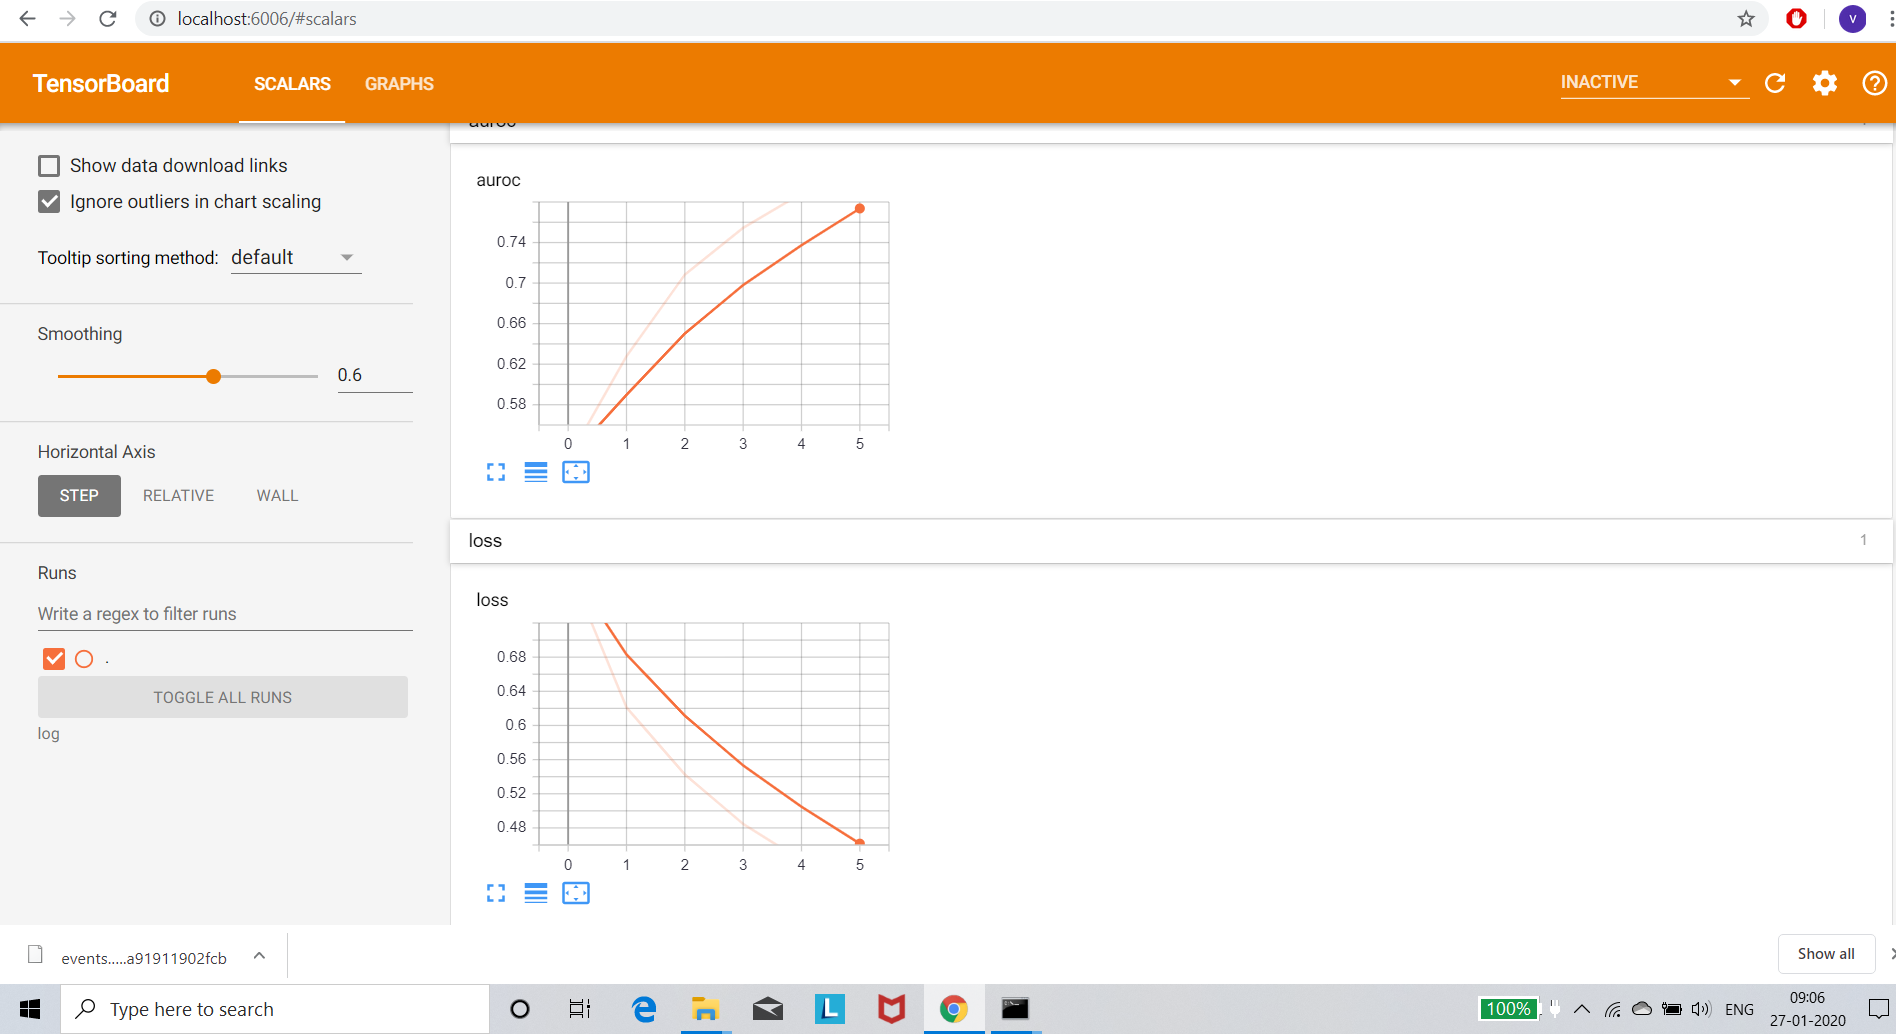

In [44]:
Image(retina=True, filename='/content/Screenshot (32).png')

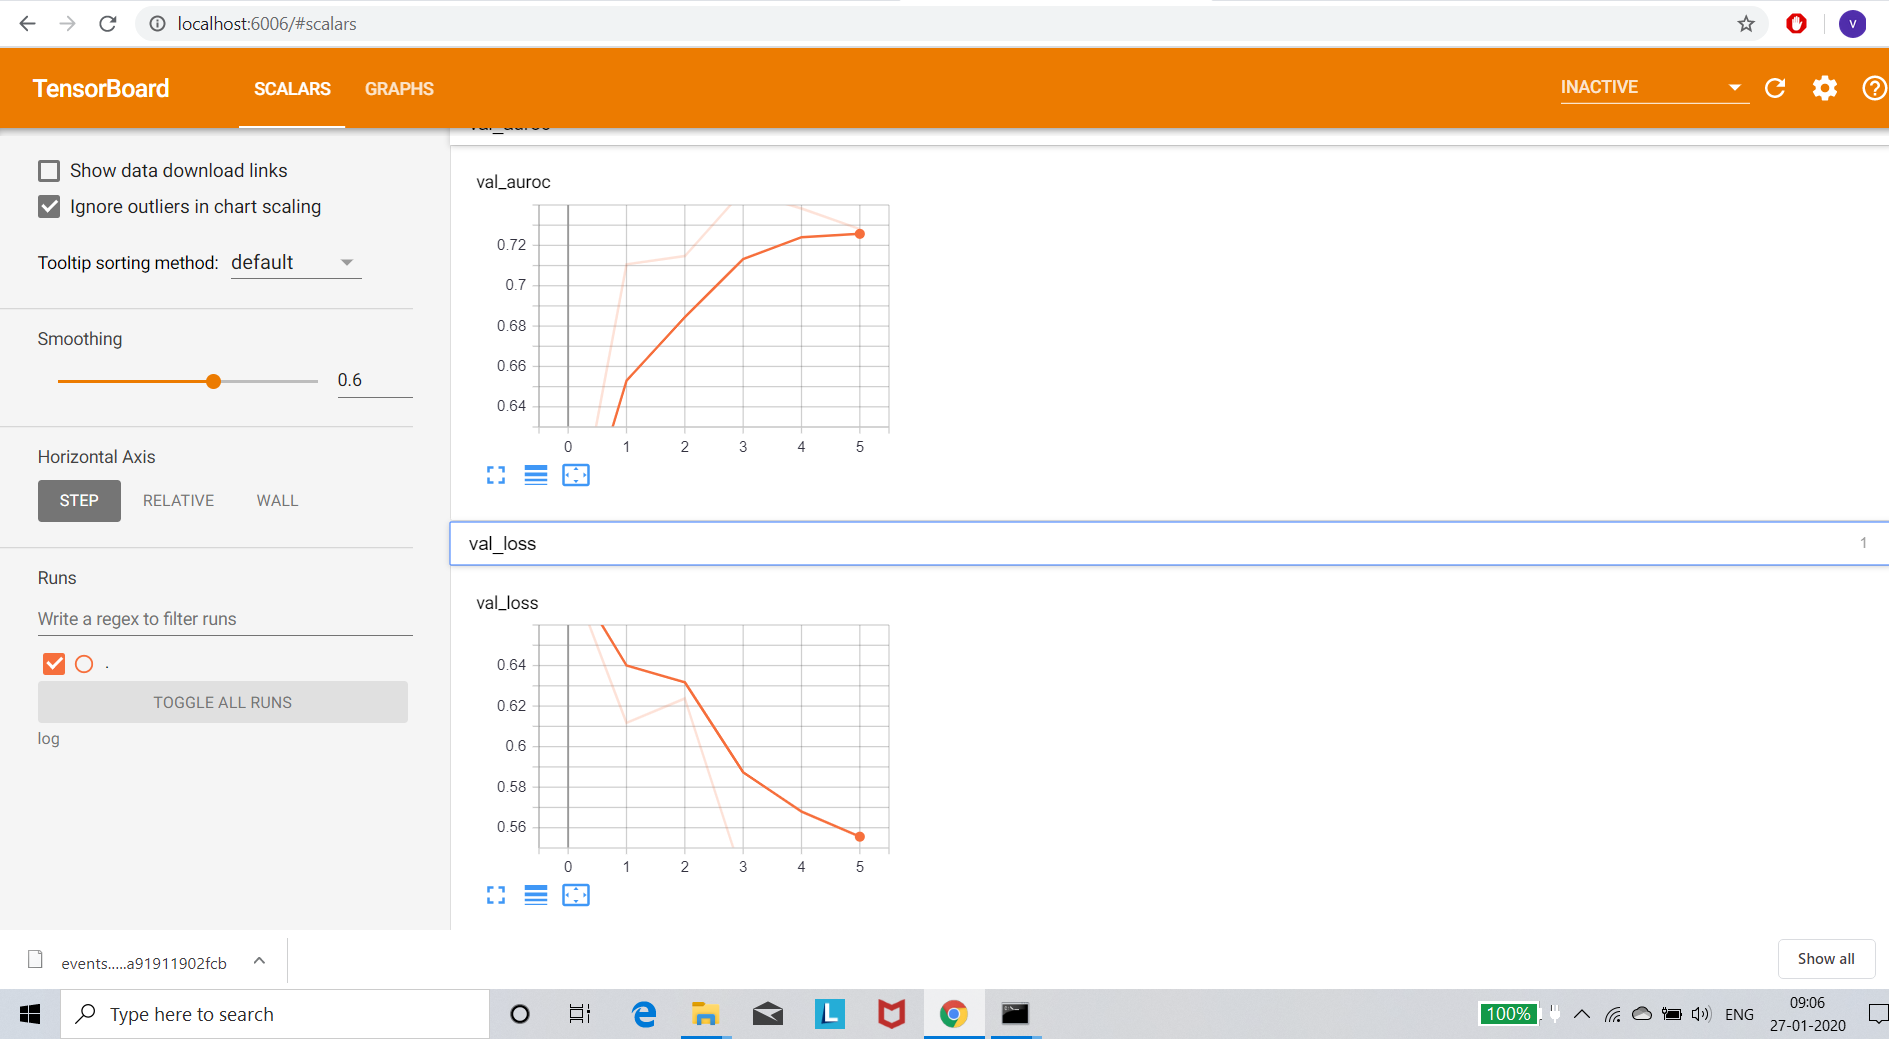

In [45]:
Image(retina=True, filename='/content/Screenshot (33).png')

**MODEL 3**

**ONE HOT ENCODING OF CATEGORICAL VARIABLES**

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)

X_train_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
X_cv_categories_one_hot = vectorizer.transform(X_cv['clean_categories'].values)
X_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(X_train_categories_one_hot.shape, y_train.shape)
print(X_cv_categories_one_hot.shape, y_cv.shape)
print(X_test_categories_one_hot.shape, y_test.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
----------------------------------------------------------------------------------------------------
After vectorizations
(53531, 9) (53531, 2)
(22942, 9) (22942, 2)
(32775, 9) (32775, 2)


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)

X_train_subcategories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_subcategories_one_hot = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_subcategories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(X_train_subcategories_one_hot.shape, y_train.shape)
print(X_cv_subcategories_one_hot.shape, y_cv.shape)
print(X_test_subcategories_one_hot.shape, y_test.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
----------------------------------------------------------------------------------------------------
After vectorizations
(53531, 30) (53531, 2)
(22942, 30) (22942, 2)
(32775, 30) (32775, 2)


In [0]:
X_train.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price'],
      dtype='object')

In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)

X_train_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_prefix_one_hot = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(X_train_prefix_one_hot.shape, y_train.shape)
print(X_cv_prefix_one_hot.shape, y_cv.shape)
print(X_test_prefix_one_hot.shape, y_test.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
----------------------------------------------------------------------------------------------------
After vectorizations
(53531, 5) (53531, 2)
(22942, 5) (22942, 2)
(32775, 5) (32775, 2)


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)

X_train_state_one_hot = vectorizer.transform(X_train['school_state'].values)
X_cv_state_one_hot = vectorizer.transform(X_cv['school_state'].values)
X_test_state_one_hot = vectorizer.transform(X_test['school_state'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(X_train_state_one_hot.shape, y_train.shape)
print(X_cv_state_one_hot.shape, y_cv.shape)
print(X_test_state_one_hot.shape, y_test.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
----------------------------------------------------------------------------------------------------
After vectorizations
(53531, 51) (53531, 2)
(22942, 51) (22942, 2)
(32775, 51) (32775, 2)


In [0]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)

X_train_grade_one_hot = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_grade_one_hot = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_grade_one_hot = vectorizer.transform(X_test['project_grade_category'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(X_train_grade_one_hot.shape, y_train.shape)
print(X_cv_grade_one_hot.shape, y_cv.shape)
print(X_test_grade_one_hot.shape, y_test.shape)

['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
----------------------------------------------------------------------------------------------------
After vectorizations
(53531, 4) (53531, 2)
(22942, 4) (22942, 2)
(32775, 4) (32775, 2)


**CREATING INPUT DATA OTHER THAN TEXT**

In [0]:
train_without_text=hstack((X_train_categories_one_hot,X_train_prefix_one_hot,X_train_state_one_hot,X_train_subcategories_one_hot,X_train_grade_one_hot,X_train_price_norm,X_train_projects_norm)).todense()
cv_without_text=hstack((X_cv_categories_one_hot,X_cv_prefix_one_hot,X_cv_state_one_hot,X_cv_subcategories_one_hot,X_cv_grade_one_hot,X_cv_price_norm,X_cv_projects_norm)).todense()
test_without_text=hstack((X_test_categories_one_hot,X_test_prefix_one_hot,X_test_state_one_hot,X_test_subcategories_one_hot,X_test_grade_one_hot,X_test_price_norm,X_test_projects_norm)).todense()
print(train_without_text.shape)
print(cv_without_text.shape)
print(test_without_text.shape)

(53531, 101)
(22942, 101)
(32775, 101)


In [0]:
train_final = np.expand_dims(train_without_text,2)
cv_final = np.expand_dims(cv_without_text,2)
test_final=np.expand_dims(test_without_text,2)
print(train_final.shape)
print(cv_final.shape)
print(test_final.shape)

(53531, 101, 1)
(22942, 101, 1)
(32775, 101, 1)


**MODEL 3**

In [0]:
essay_text=Input(shape=(300,),name='essay_text')
x=Embedding(vocab_size,300,weights=[embedding_matrix_train],input_length=300)(essay_text)
lstm_1=LSTM(50,recurrent_dropout=0.5,return_sequences=True)(x)
flatten_1=Flatten()(lstm_1)

other_features=Input(shape=(101,1),name='other_features')
x = Conv1D(filters=128, kernel_size = 2, padding='valid', kernel_initializer='he_normal',)(other_features)
x = Conv1D(filters=128, kernel_size = 2, padding='valid', kernel_initializer='he_normal',)(x)
x = Flatten()(x)

con=concatenate([flatten_1,x])

x=Dense(128, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(con)
x=Dropout(0.5)(x)
x=Dense(128,activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)
x=Dropout(0.5)(x)
x=BatchNormalization()(x)
x=Dense(128, activation='relu',kernel_initializer="he_normal",kernel_regularizer=l2(0.001))(x)

final_output = Dense(2, activation='softmax')(x)

model_3 = Model(inputs=[essay_text,other_features], outputs=[final_output])
print(model_3.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_text (InputLayer)         (None, 300)          0                                            
__________________________________________________________________________________________________
other_features (InputLayer)     (None, 101, 1)       0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 300, 300)     12768900    essay_text[0][0]                 
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 100, 128)     384         other_features[0][0]             
____________________________________________________________________________________________

In [0]:
from keras.callbacks import TensorBoard
checkpoint_3 = ModelCheckpoint("model_3.1",
                             monitor="val_auroc",
                             mode="max",
                             save_best_only = True,
                             verbose=1)
earlystop = EarlyStopping(monitor = 'val_auroc', 
                            mode="max",
                            min_delta = 0, 
                            patience = 3,
                            verbose = 1,)
tensorboard_2=TensorBoard(log_dir='lstm_3',batch_size=512)
callbacks_2=[checkpoint_3,earlystop,tensorboard_2]

In [0]:
train_model_3=[padded_train,train_final]
cv_model_3=[padded_cv,cv_final]
test_model_3=[padded_test,test_final]

In [0]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[auroc])
LSTM_3 = model_3.fit(train_model_3, y_train, batch_size=512, epochs=10, verbose=1,callbacks=callbacks_2, validation_data=(cv_model_3, y_cv))

Train on 53531 samples, validate on 22942 samples
Epoch 1/10
53531/53531 [==============================] - 509s 10ms/step - loss: 1.1905 - auroc: 0.5222 - val_loss: 0.9167 - val_auroc: 0.5946

Epoch 00001: val_auroc improved from -inf to 0.59462, saving model to model_3.1
Epoch 2/10
53531/53531 [==============================] - 504s 9ms/step - loss: 0.8501 - auroc: 0.5629 - val_loss: 0.7516 - val_auroc: 0.6469

Epoch 00002: val_auroc improved from 0.59462 to 0.64692, saving model to model_3.1
Epoch 3/10
53531/53531 [==============================] - 496s 9ms/step - loss: 0.7080 - auroc: 0.6658 - val_loss: 0.6449 - val_auroc: 0.7220

Epoch 00003: val_auroc improved from 0.64692 to 0.72202, saving model to model_3.1
Epoch 4/10
53531/53531 [==============================] - 495s 9ms/step - loss: 0.6096 - auroc: 0.7355 - val_loss: 0.6054 - val_auroc: 0.7544

Epoch 00004: val_auroc improved from 0.72202 to 0.75437, saving model to model_3.1
Epoch 5/10
53531/53531 [========================

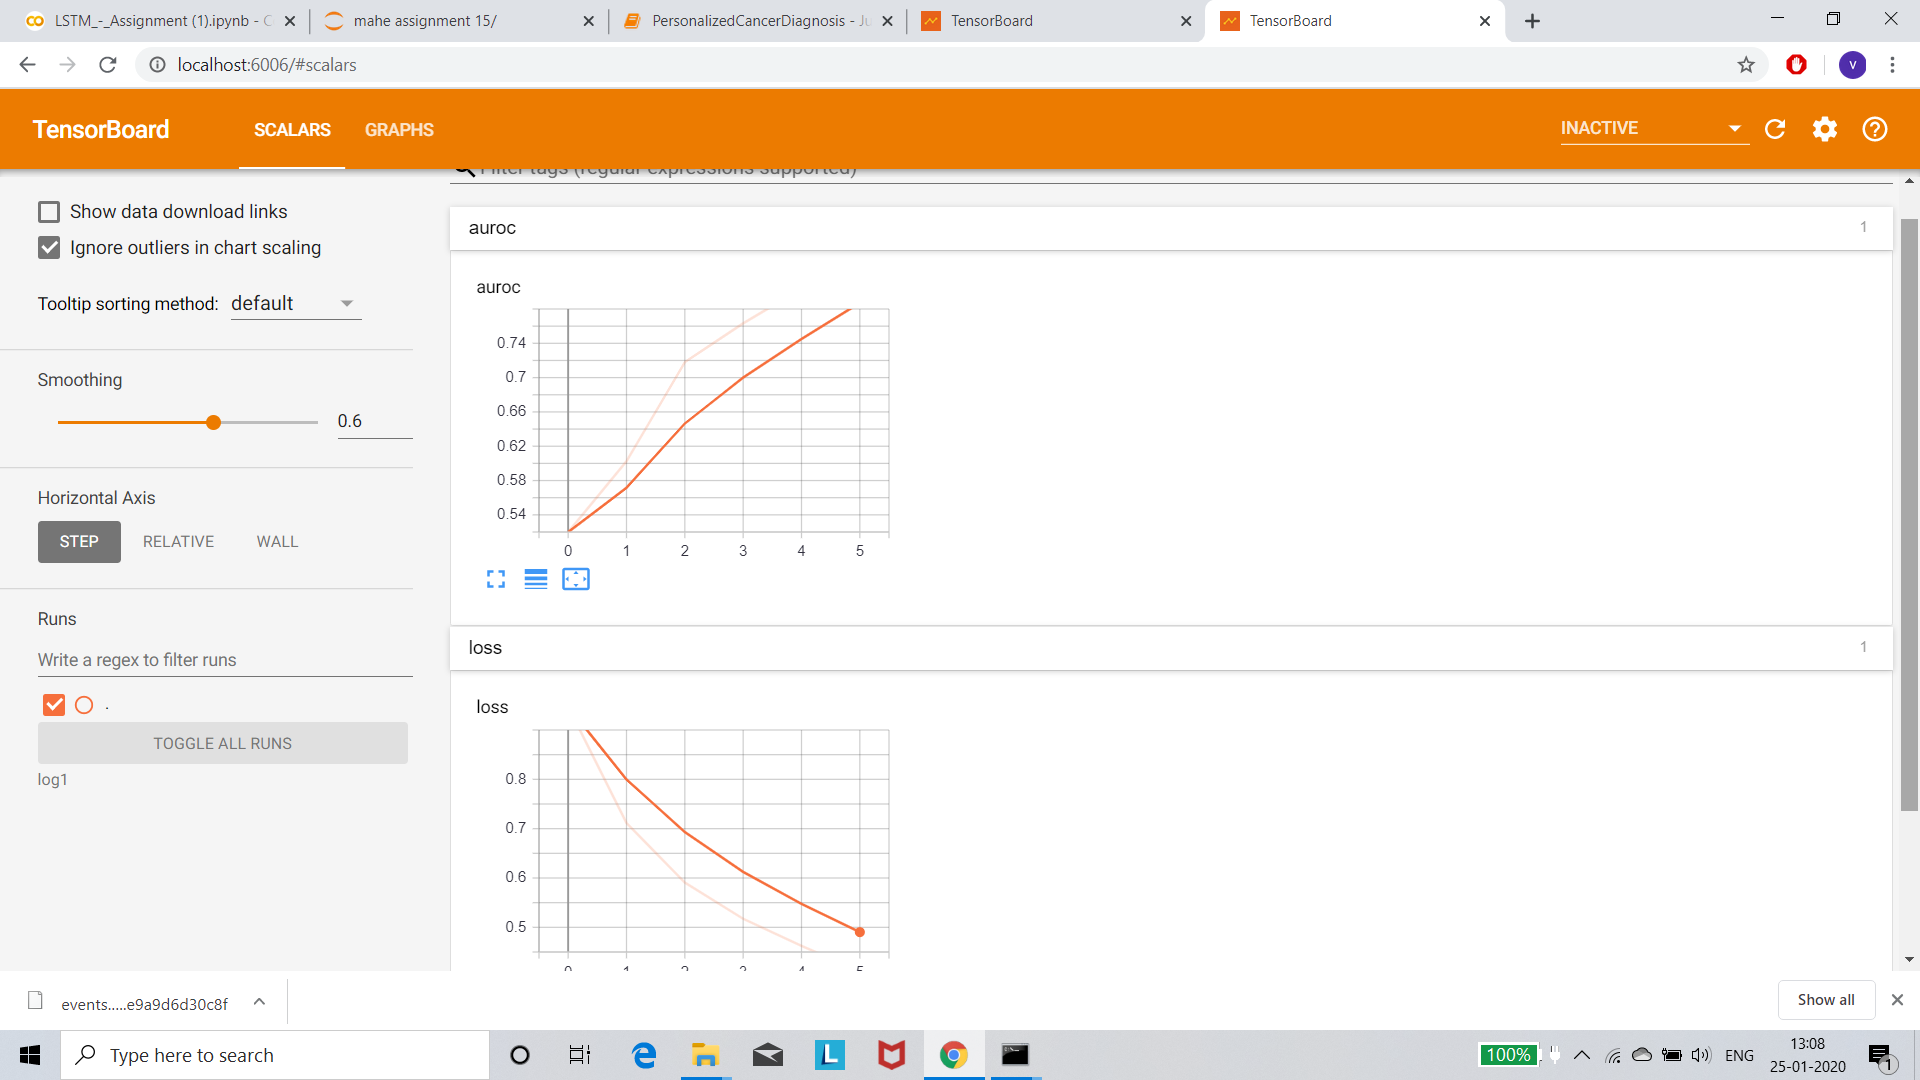

In [0]:
Image(retina=True, filename='/content/Screenshot (28).png')

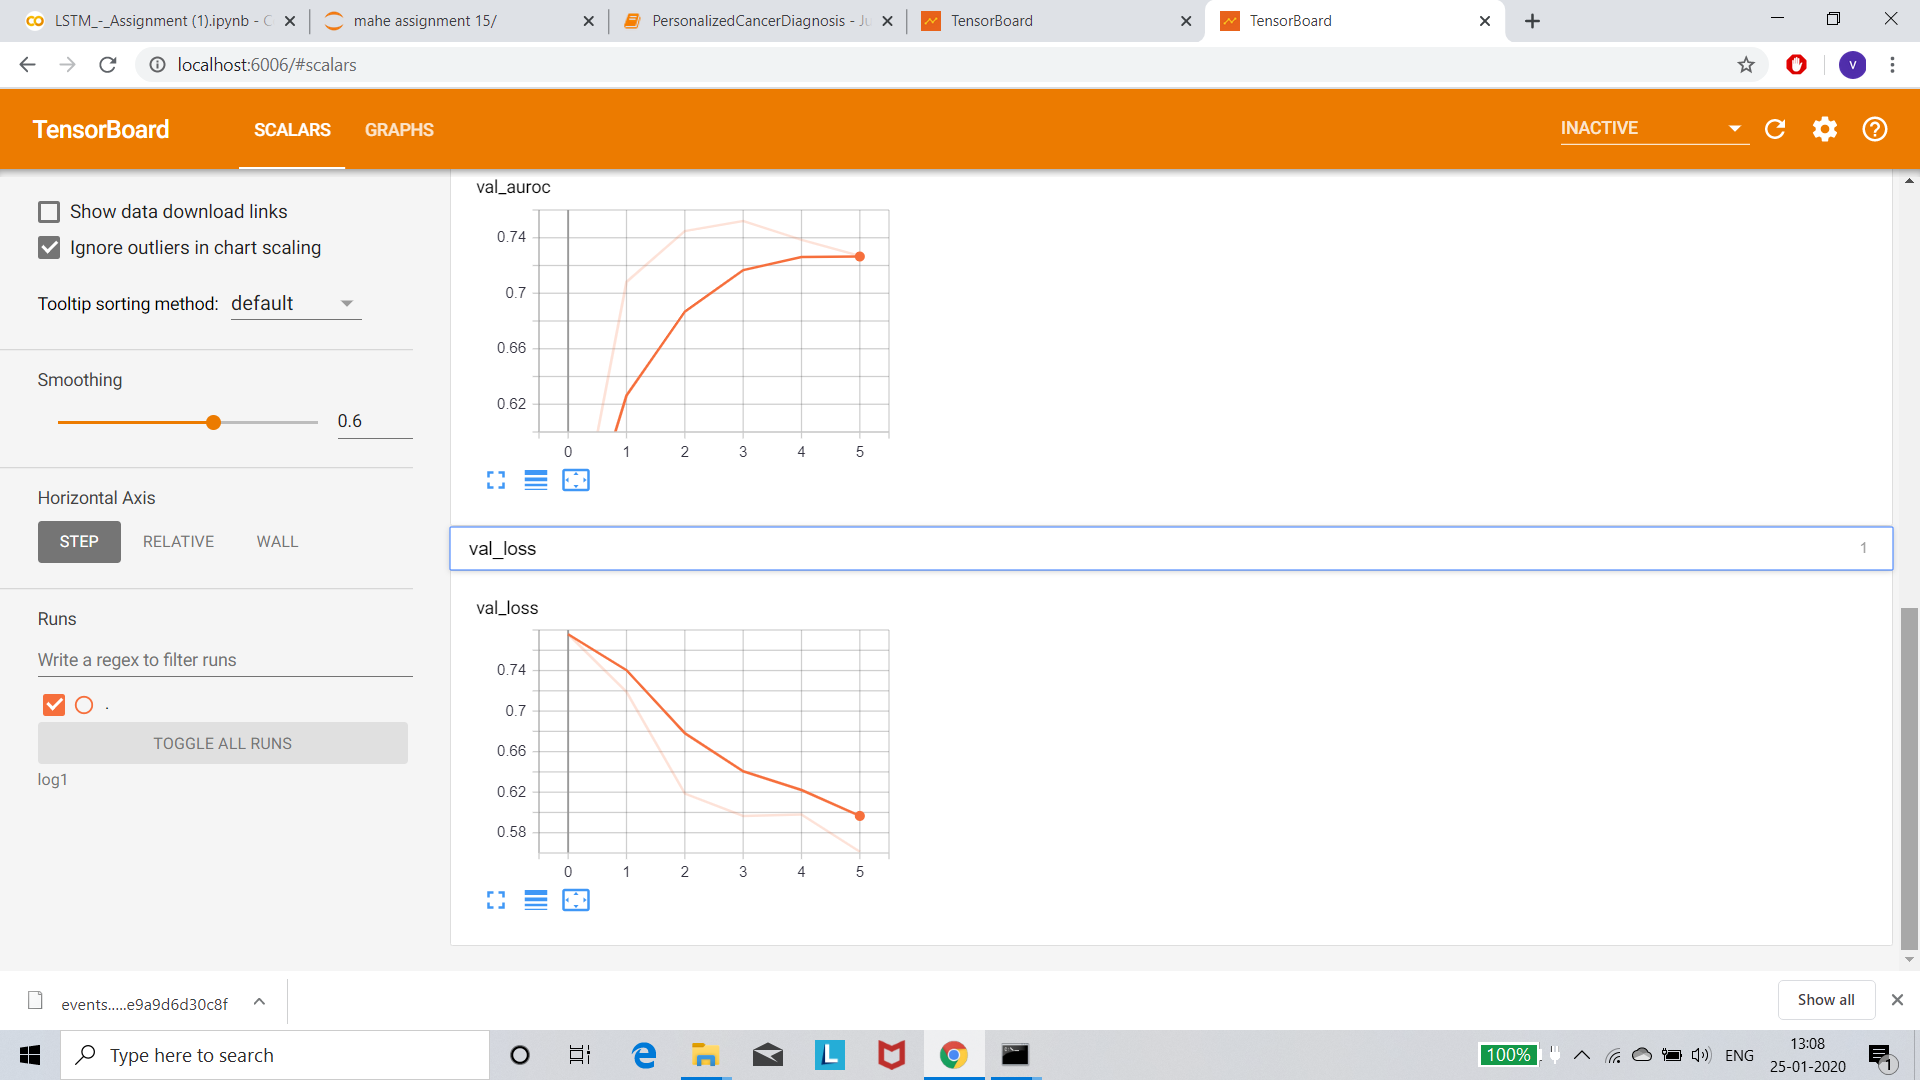

In [0]:
Image(retina=True, filename='/content/Screenshot (29).png')

**CONCLUSION**

In [43]:
from prettytable import PrettyTable

conclusion=PrettyTable()
conclusion.field_names = ["ARCHITECTURE","EPOCHS", "TRAIN_auc", "VAL_auc",]
conclusion.add_row(["LSTM_1", 4, 0.7632,0.7520 ])
conclusion.add_row(["LSTM_2",5, 0.7545,0.7470])
conclusion.add_row(["LSTM_3", 5,0.7747,0.7550])

print(conclusion.get_string(start=0,end=7))


+--------------+--------+-----------+---------+
| ARCHITECTURE | EPOCHS | TRAIN_auc | VAL_auc |
+--------------+--------+-----------+---------+
|    LSTM_1    |   4    |   0.7632  |  0.752  |
|    LSTM_2    |   5    |   0.7545  |  0.747  |
|    LSTM_3    |   5    |   0.7747  |  0.755  |
+--------------+--------+-----------+---------+
